In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image

from data import PiDataset
from model import MlpVAE

### Load data

In [2]:
# load data
X = np.load('pi_xs.npy')
Y = np.load('pi_ys.npy')
image_array = np.array(Image.open('sparse_pi_colored.jpg'))
rgb_values = image_array[X, Y]

### Set hyperparameters and create model

In [3]:
# set hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"

embedding_dim = 64
latent_dim = 128
num_items = [300, 300, 256, 256, 256]
dropout_rate = 0.1
model = MlpVAE(num_items, embedding_dim, latent_dim, dropout_rate, device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

pi_dataset = PiDataset(X, Y, rgb_values, embedding_dim=embedding_dim, device=device)
pi_loader = torch.utils.data.DataLoader(pi_dataset, batch_size=128, shuffle=True)

### Train model

In [4]:
model.fit(pi_loader, criterion, optimizer)

epoch 1/100: loss: 354.62248001098635 p_loss: 28.014462757110596 z_loss: 130.50677833557128 
epoch 21/100: loss: 186.57257575988768 p_loss: 22.680255889892578 z_loss: 5.130528450012207 
epoch 41/100: loss: 161.85677261352538 p_loss: 19.159560918807983 z_loss: 8.580285453796387 
epoch 61/100: loss: 145.64344635009766 p_loss: 16.93086919784546 z_loss: 10.196492862701415 
epoch 81/100: loss: 132.43927879333495 p_loss: 15.100128650665283 z_loss: 11.6382497549057 
loss: 126.68639049530029 p_loss: 14.285139727592469 z_loss: 12.40527286529541 


### Generated image

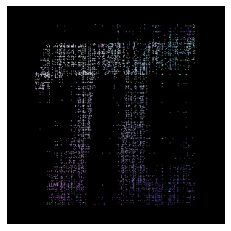

In [5]:
img_data = np.zeros((300, 300, 3), dtype=np.uint8)
for _ in range(10):
    noises = torch.randn(5000, latent_dim).to(device)
    q = model.generate(noises)
    img_data[q[:, 0], q[:, 1]] = q[:, 2:]

plt.axis('off')
plt.imshow(Image.fromarray(img_data))

### Source image

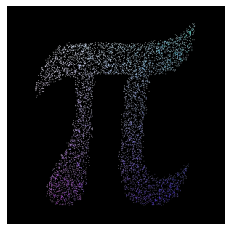

In [6]:
# source image
img_data = np.zeros((300, 300, 3), dtype=np.uint8)
img_data[X, Y] = rgb_values
plt.axis('off')
plt.imshow(Image.fromarray(img_data))